In [ ]:
import pandas as pd

file_path = "/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv"
df = pd.read_csv(file_path)

df.head()

,Address,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,"4311 Main St, San Jose, CA 95132",$2850K,5,4,2596,Single Family
1,"7446 Main St, San Jose, CA 95158",$1483K,6,4,1796,Apartment
2,"2515 Main St, San Jose, CA 95160",$649K,4,4,3511,Apartment
3,"6960 Main St, San Jose, CA 95128",$1177K,1,4,1427,Apartment
4,"3687 Main St, San Jose, CA 95183",$2136K,2,2,4544,Condo


In [74]:
df.columns

Index(['Street Address', 'City', 'State', 'ZIP Code', 'Price', 'Bedrooms',
       'Bathrooms', 'Square Footage', 'Property Type'],
      dtype='object')

In [76]:
num_rows = df.shape[0]
num_rows

500

In [66]:
# basic information about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address         500 non-null    object
 1   Price           500 non-null    object
 2   Bedrooms        500 non-null    int64 
 3   Bathrooms       500 non-null    int64 
 4   Square Footage  500 non-null    int64 
 5   Property Type   500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB
None


In [67]:
# check if there are any column with null 
print(df.isnull().sum())

Address           0
Price             0
Bedrooms          0
Bathrooms         0
Square Footage    0
Property Type     0
dtype: int64


In [ ]:
df["Price"] = df["Price"].replace({"[$K,]": ""}, regex=True).astype(float)

df["Price"] = df["Price"].apply(lambda x: f"{int(x)}K")

df["Bedrooms"] = df["Bedrooms"].astype(int)
df["Bathrooms"] = df["Bathrooms"].astype(int)
df["Square Footage"] = df["Square Footage"].astype(int)

if "Listing Date" in df.columns:
    df["Listing Date"] = pd.to_datetime(df["Listing Date"])

In [69]:
df.head()

,Address,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,"4311 Main St, San Jose, CA 95132",2850K,5,4,2596,Single Family
1,"7446 Main St, San Jose, CA 95158",1483K,6,4,1796,Apartment
2,"2515 Main St, San Jose, CA 95160",649K,4,4,3511,Apartment
3,"6960 Main St, San Jose, CA 95128",1177K,1,4,1427,Apartment
4,"3687 Main St, San Jose, CA 95183",2136K,2,2,4544,Condo


In [ ]:
# Convert "Price" column: Remove "K", convert to full number, format with commas
df["Price"] = df["Price"].str.replace("K", "").astype(float) * 1_000 
df["Price"] = df["Price"].astype(int)

In [71]:
df.head()

,Address,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,"4311 Main St, San Jose, CA 95132",2850000,5,4,2596,Single Family
1,"7446 Main St, San Jose, CA 95158",1483000,6,4,1796,Apartment
2,"2515 Main St, San Jose, CA 95160",649000,4,4,3511,Apartment
3,"6960 Main St, San Jose, CA 95128",1177000,1,4,1427,Apartment
4,"3687 Main St, San Jose, CA 95183",2136000,2,2,4544,Condo


In [ ]:
df[['Street Address', 'City', 'State', 'ZIP Code']] = df['Address'].str.extract(r'^(.*),\s*(.*),\s*(\w{2})\s*(\d{5})$')

df = df.drop(columns=['Address'])

column_order = ['Street Address', 'City', 'State', 'ZIP Code', 'Price', 'Bedrooms', 'Bathrooms', 'Square Footage', 'Property Type']
df = df[column_order]
df.head()

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,4311 Main St,San Jose,CA,95132,2850000,5,4,2596,Single Family
1,7446 Main St,San Jose,CA,95158,1483000,6,4,1796,Apartment
2,2515 Main St,San Jose,CA,95160,649000,4,4,3511,Apartment
3,6960 Main St,San Jose,CA,95128,1177000,1,4,1427,Apartment
4,3687 Main St,San Jose,CA,95183,2136000,2,2,4544,Condo


In [77]:
updated_csv_path = "/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv"
df.to_csv(updated_csv_path, index=False)

In [78]:
# Count the number of each property type in the dataset
property_type_counts = df["Property Type"].value_counts()

# Display the counts
property_type_counts

Property Type
Single Family    136
Apartment        124
Townhouse        121
Condo            119
Name: count, dtype: int64

In [ ]:
import random

df["Property Type"] = df["Property Type"].apply(lambda x: random.choice(["Apartment", "Single Family"]) if x in ["Condo", "Townhouse"] else x)

df.head(10)

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,4311 Main St,San Jose,CA,95132,2850000,5,4,2596,Single Family
1,7446 Main St,San Jose,CA,95158,1483000,6,4,1796,Apartment
2,2515 Main St,San Jose,CA,95160,649000,4,4,3511,Apartment
3,6960 Main St,San Jose,CA,95128,1177000,1,4,1427,Apartment
4,3687 Main St,San Jose,CA,95183,2136000,2,2,4544,Apartment
5,4219 Main St,San Jose,CA,95172,1735000,5,3,4591,Single Family
6,7641 Main St,San Jose,CA,95128,2075000,6,2,3452,Apartment
7,599 Main St,San Jose,CA,95125,2670000,2,2,4339,Single Family
8,3134 Main St,San Jose,CA,95171,1427000,3,4,3068,Single Family
9,7649 Main St,San Jose,CA,95174,1143000,6,2,835,Apartment


In [83]:
# Save the updated dataset
updated_file_path_filtered = "/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv"
df.to_csv(updated_file_path_filtered, index=False)

In [ ]:
# we don't need townhouse and condo in our website for now
# Count the number of each property type in the dataset
property_type_counts = df["Property Type"].value_counts()

# Display the counts
property_type_counts

Property Type
Apartment        251
Single Family    249
Name: count, dtype: int64

In [ ]:
# Add images into csv file
import pandas as pd
import os

df = pd.read_csv("/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv")

image_base_path = "property_images/"

def get_image_path(row):
    folder = "apartment_images" if row["Property Type"] == "Apartment" else "single_family_images"
    filename = f"{row['Street Address'].replace(' ', '_')}.jpg"
    return os.path.join(image_base_path, folder, filename)

df["Image_Path"] = df.apply(get_image_path, axis=1)

df.to_csv("real_estate_data_with_images.csv", index=False)

print(df.head())


  Street Address      City State  ZIP Code    Price  Bedrooms  Bathrooms  \
0   4311 Main St  San Jose    CA     95132  2850000         5          4   
1   7446 Main St  San Jose    CA     95158  1483000         6          4   
2   2515 Main St  San Jose    CA     95160   649000         4          4   
3   6960 Main St  San Jose    CA     95128  1177000         1          4   
4   3687 Main St  San Jose    CA     95183  2136000         2          2   

   Square Footage  Property Type  \
0            2596  Single Family   
1            1796      Apartment   
2            3511      Apartment   
3            1427      Apartment   
4            4544      Apartment   

                                          Image_Path  
0  property_images/single_family_images/4311_Main...  
1  property_images/apartment_images/7446_Main_St.jpg  
2  property_images/apartment_images/2515_Main_St.jpg  
3  property_images/apartment_images/6960_Main_St.jpg  
4  property_images/apartment_images/3687_Main_St.jp

In [2]:
df.head(20)

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,4311 Main St,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/4311_Main...
1,7446 Main St,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/7446_Main_St.jpg
2,2515 Main St,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/2515_Main_St.jpg
3,6960 Main St,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/6960_Main_St.jpg
4,3687 Main St,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/3687_Main_St.jpg
5,4219 Main St,San Jose,CA,95172,1735000,5,3,4591,Single Family,property_images/single_family_images/4219_Main...
6,7641 Main St,San Jose,CA,95128,2075000,6,2,3452,Apartment,property_images/apartment_images/7641_Main_St.jpg
7,599 Main St,San Jose,CA,95125,2670000,2,2,4339,Single Family,property_images/single_family_images/599_Main_...
8,3134 Main St,San Jose,CA,95171,1427000,3,4,3068,Single Family,property_images/single_family_images/3134_Main...
9,7649 Main St,San Jose,CA,95174,1143000,6,2,835,Apartment,property_images/apartment_images/7649_Main_St.jpg


In [3]:
import pandas as pd
import random

file_path = '/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_with_images.csv'
df = pd.read_csv(file_path)

# List of random street names that could resemble real San Jose streets
street_names = [
    "El Camino Real", "Almaden Rd", "Santa Teresa Blvd", "Tully Rd", 
    "Monterey Hwy", "Pomeroy Ave", "South Bascom Ave", "Berryessa Rd", 
    "Silver Creek Valley Rd", "Quimby Rd", "Lick Mill Blvd", "Brophy Ct", 
    "Senter Rd", "Jackson Ave", "Lelong St", "McKee Rd", "Mabury Rd", 
    "Piedmont Rd", "King Rd", "McLaughlin Ave", "Muirwood Dr", "Blossom Hill Road",
    "Fairway Drive"
]

random_streets = (street_names * (len(df) // len(street_names) + 1))[:len(df)]

df['Street Address'] = df['Street Address'].apply(lambda x: f"{random.choice(range(1000, 9999))} {random.choice(random_streets)}")


In [5]:
df.to_csv("real_estate_data_with_images.csv", index=False)
df.head(20)


,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,6957 Blossom Hill Road,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/4311_Main...
1,1265 Lelong St,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/7446_Main_St.jpg
2,8607 Pomeroy Ave,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/2515_Main_St.jpg
3,1719 Berryessa Rd,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/6960_Main_St.jpg
4,7088 Piedmont Rd,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/3687_Main_St.jpg
5,2135 South Bascom Ave,San Jose,CA,95172,1735000,5,3,4591,Single Family,property_images/single_family_images/4219_Main...
6,1258 Piedmont Rd,San Jose,CA,95128,2075000,6,2,3452,Apartment,property_images/apartment_images/7641_Main_St.jpg
7,6417 Santa Teresa Blvd,San Jose,CA,95125,2670000,2,2,4339,Single Family,property_images/single_family_images/599_Main_...
8,9218 South Bascom Ave,San Jose,CA,95171,1427000,3,4,3068,Single Family,property_images/single_family_images/3134_Main...
9,1020 Almaden Rd,San Jose,CA,95174,1143000,6,2,835,Apartment,property_images/apartment_images/7649_Main_St.jpg


In [6]:
import pandas as pd
import random

file_path = '/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv'
df = pd.read_csv(file_path)

# List of random street names that could resemble real San Jose streets
street_names = [
    "El Camino Real", "Almaden Rd", "Santa Teresa Blvd", "Tully Rd", 
    "Monterey Hwy", "Pomeroy Ave", "South Bascom Ave", "Berryessa Rd", 
    "Silver Creek Valley Rd", "Quimby Rd", "Lick Mill Blvd", "Brophy Ct", 
    "Senter Rd", "Jackson Ave", "Lelong St", "McKee Rd", "Mabury Rd", 
    "Piedmont Rd", "King Rd", "McLaughlin Ave", "Muirwood Dr", "Blossom Hill Road",
    "Fairway Drive"
]

random_streets = (street_names * (len(df) // len(street_names) + 1))[:len(df)]

df['Street Address'] = df['Street Address'].apply(lambda x: f"{random.choice(range(1000, 9999))} {random.choice(random_streets)}")

df.to_csv("real_estate_data_with_images.csv", index=False)
df.head(10)


,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type
0,5427 Lick Mill Blvd,San Jose,CA,95132,2850000,5,4,2596,Single Family
1,8774 Blossom Hill Road,San Jose,CA,95158,1483000,6,4,1796,Apartment
2,9173 Senter Rd,San Jose,CA,95160,649000,4,4,3511,Apartment
3,7669 Almaden Rd,San Jose,CA,95128,1177000,1,4,1427,Apartment
4,1800 McKee Rd,San Jose,CA,95183,2136000,2,2,4544,Apartment
5,7276 Santa Teresa Blvd,San Jose,CA,95172,1735000,5,3,4591,Single Family
6,5937 Berryessa Rd,San Jose,CA,95128,2075000,6,2,3452,Apartment
7,2917 Brophy Ct,San Jose,CA,95125,2670000,2,2,4339,Single Family
8,2738 Fairway Drive,San Jose,CA,95171,1427000,3,4,3068,Single Family
9,9977 Santa Teresa Blvd,San Jose,CA,95174,1143000,6,2,835,Apartment


In [8]:
import pandas as pd
import os

df = pd.read_csv("/Users/zeynepsalihoglu/Downloads/RealHaven/san_jose_houses_sample_data.csv")

image_base_path = "property_images/"

apartment_counter = 1
single_family_counter = 1

def get_image_path(row):
    global apartment_counter, single_family_counter

    if row["Property Type"] == "Apartment":
        folder = "apartment_images"
        filename = f"apartment_{apartment_counter}.jpg"
        apartment_counter += 1 
    else:
        folder = "single_family_images"
        filename = f"single_family_{single_family_counter}.jpg"
        single_family_counter += 1
    return os.path.join(image_base_path, folder, filename)

df["Image_Path"] = df.apply(get_image_path, axis=1)

df.to_csv("real_estate_data_with_images_v1.csv", index=False)

df.head(10)

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,4311 Main St,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...
1,7446 Main St,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg
2,2515 Main St,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg
3,6960 Main St,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg
4,3687 Main St,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg
5,4219 Main St,San Jose,CA,95172,1735000,5,3,4591,Single Family,property_images/single_family_images/single_fa...
6,7641 Main St,San Jose,CA,95128,2075000,6,2,3452,Apartment,property_images/apartment_images/apartment_5.jpg
7,599 Main St,San Jose,CA,95125,2670000,2,2,4339,Single Family,property_images/single_family_images/single_fa...
8,3134 Main St,San Jose,CA,95171,1427000,3,4,3068,Single Family,property_images/single_family_images/single_fa...
9,7649 Main St,San Jose,CA,95174,1143000,6,2,835,Apartment,property_images/apartment_images/apartment_6.jpg


In [10]:
import pandas as pd
import random

file_path = '/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_with_images_v1.csv'
df = pd.read_csv(file_path)

# List of random street names that could resemble real San Jose streets
street_names = [
    "El Camino Real", "Almaden Rd", "Santa Teresa Blvd", "Tully Rd", 
    "Monterey Hwy", "Pomeroy Ave", "South Bascom Ave", "Berryessa Rd", 
    "Silver Creek Valley Rd", "Quimby Rd", "Lick Mill Blvd", "Brophy Ct", 
    "Senter Rd", "Jackson Ave", "Lelong St", "McKee Rd", "Mabury Rd", 
    "Piedmont Rd", "King Rd", "McLaughlin Ave", "Muirwood Dr", "Blossom Hill Road",
    "Fairway Drive"
]

random_streets = (street_names * (len(df) // len(street_names) + 1))[:len(df)]

df['Street Address'] = df['Street Address'].apply(lambda x: f"{random.choice(range(1000, 9999))} {random.choice(random_streets)}")


In [11]:
df.to_csv("/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_with_images_v1.csv", index=False)
df.head(10)

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,7923 South Bascom Ave,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...
1,3917 McLaughlin Ave,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg
2,1426 Quimby Rd,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg
3,1849 Jackson Ave,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg
4,5018 Jackson Ave,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg
5,2826 Quimby Rd,San Jose,CA,95172,1735000,5,3,4591,Single Family,property_images/single_family_images/single_fa...
6,2153 Senter Rd,San Jose,CA,95128,2075000,6,2,3452,Apartment,property_images/apartment_images/apartment_5.jpg
7,3089 El Camino Real,San Jose,CA,95125,2670000,2,2,4339,Single Family,property_images/single_family_images/single_fa...
8,1086 Senter Rd,San Jose,CA,95171,1427000,3,4,3068,Single Family,property_images/single_family_images/single_fa...
9,1480 Monterey Hwy,San Jose,CA,95174,1143000,6,2,835,Apartment,property_images/apartment_images/apartment_6.jpg


In [2]:
import pandas as pd

file_path = "/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_with_images_v1.csv"
df = pd.read_csv(file_path)

df.head()

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,7923 South Bascom Ave,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...
1,3917 McLaughlin Ave,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg
2,1426 Quimby Rd,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg
3,1849 Jackson Ave,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg
4,5018 Jackson Ave,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg


In [8]:
df.__len__()

500

In [16]:
import pandas as pd
import random
import numpy as np

file_path = "/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_with_images_v1.csv"
original_df = pd.read_csv(file_path)

original_columns = original_df.columns.tolist()

column_mapping = {
    "Street Address": lambda: f"{random.randint(100, 9999)} {random.choice(['Oak St', 'Maple Ave', 'Pine St', 'Elm St', 'Cedar Ave', 'Willow Dr', 'Sunset Blvd', 'Birch Ln', 'Main St', 'Park Ave'])}",
    "City": lambda: "San Jose",
    "State": lambda: "CA",
    "ZIP Code": lambda: random.choice(['95112', '95123', '95125', '95126', '95127', '95128', '95129', '95130', '95131', '95132']),
    "Image_Path": lambda: "",
    "Property Type": lambda: random.choice(['Single Family', 'Apartment']),
}

new_rows = []

for _ in range(500):
    row = {}

    property_type = column_mapping["Property Type"]()
    row["Property Type"] = property_type

    if property_type == "Single Family":
        row["Bedrooms"] = random.randint(3, 6)
    else: 
        row["Bedrooms"] = random.randint(1, 4)

    if row["Bedrooms"] == 1:
        row["Bathrooms"] = 1
    else:
        row["Bathrooms"] = random.randint(1, row["Bedrooms"] - 1)

    base_sqft = 400
    row["Square Footage"] = base_sqft * (row["Bedrooms"] + row["Bathrooms"]) + random.randint(-100, 400)

    price_per_sqft = random.randint(300, 800)
    row["Price"] = row["Square Footage"] * price_per_sqft

    for col in original_columns:
        if col in row:
            continue 
        elif col in column_mapping:
            row[col] = column_mapping[col]()
        else:
            row[col] = np.nan

    new_rows.append(row)

new_properties_df = pd.DataFrame(new_rows, columns=original_columns)
combined_df = pd.concat([original_df, new_properties_df], ignore_index=True)

final_path = "/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_new.csv"
combined_df.to_csv(final_path, index=False)

combined_df.tail()


,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
995,3662 Maple Ave,San Jose,CA,95127,1420794,3,1,1902,Apartment,
996,2611 Maple Ave,San Jose,CA,95112,1215249,5,3,3543,Single Family,
997,7619 Willow Dr,San Jose,CA,95131,982215,6,1,2847,Single Family,
998,272 Park Ave,San Jose,CA,95130,894355,4,1,2323,Single Family,
999,1883 Main St,San Jose,CA,95132,550718,1,1,973,Apartment,


In [17]:
combined_df.head()

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,7923 South Bascom Ave,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...
1,3917 McLaughlin Ave,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg
2,1426 Quimby Rd,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg
3,1849 Jackson Ave,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg
4,5018 Jackson Ave,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg


In [30]:
import pandas as pd
import os

df = pd.read_csv("/Users/zeynepsalihoglu/Downloads/RealHaven/real_estate_data_new.csv")

image_base_path = "property_images/"

apartment_counter = 252
single_family_counter = 250

def get_image_path(row_index, row):
    global apartment_counter, single_family_counter
    if row_index < 500:
        return row.get("Image_Path", "")
    if row["Property Type"] == "Apartment":
        folder = "apartment_images"
        filename = f"apartment_{apartment_counter}.jpg"
        apartment_counter += 1 
    else:
        folder = "single_family_images"
        filename = f"single_family_{single_family_counter}.jpg"
        single_family_counter += 1
    return os.path.join(image_base_path, folder, filename)

df["Image_Path"] = [get_image_path(i, row) for i, row in df.iterrows()]

df.to_csv("real_estate_data_with_images_v2.csv", index=False)

df.tail(10)

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
990,2428 Willow Dr,San Jose,CA,95132,472890,2,1,1433,Apartment,property_images/apartment_images/apartment_513...
991,6301 Oak St,San Jose,CA,95112,2111196,6,4,4029,Single Family,property_images/single_family_images/single_fa...
992,4834 Birch Ln,San Jose,CA,95112,1681680,4,2,2310,Apartment,property_images/apartment_images/apartment_514...
993,9372 Pine St,San Jose,CA,95129,1960452,6,1,3068,Single Family,property_images/single_family_images/single_fa...
994,201 Main St,San Jose,CA,95131,1276618,5,2,2722,Single Family,property_images/single_family_images/single_fa...
995,3662 Maple Ave,San Jose,CA,95127,1420794,3,1,1902,Apartment,property_images/apartment_images/apartment_515...
996,2611 Maple Ave,San Jose,CA,95112,1215249,5,3,3543,Single Family,property_images/single_family_images/single_fa...
997,7619 Willow Dr,San Jose,CA,95131,982215,6,1,2847,Single Family,property_images/single_family_images/single_fa...
998,272 Park Ave,San Jose,CA,95130,894355,4,1,2323,Single Family,property_images/single_family_images/single_fa...
999,1883 Main St,San Jose,CA,95132,550718,1,1,973,Apartment,property_images/apartment_images/apartment_516...


In [25]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [39]:
df.__len__()

1000

In [18]:
import pandas as pd
file_path = '/Users/zeynepsalihoglu/Downloads/RealHaven/data_part/real_estate_data_with_images_v2.csv'
df_new = pd.read_csv(file_path)
df_new.head()

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path
0,7923 South Bascom Ave,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...
1,3917 McLaughlin Ave,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg
2,1426 Quimby Rd,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg
3,1849 Jackson Ave,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg
4,5018 Jackson Ave,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg


In [19]:
df_new["Bedrooms"].max()

np.int64(6)

In [20]:
df_new["Bathrooms"].max()

np.int64(5)

In [21]:
for i in range(1, 7):
    df_new[f'bedroom_{i}'] = pd.NA

for i in range(1, 6):
    df_new[f'bathroom_{i}'] = pd.NA

df_new['kitchen'] = pd.NA
df_new['living_room'] = pd.NA
df_new['dining'] = pd.NA

# Add a new column for listing type
df_new['listing_type'] = pd.NA

In [22]:
df_new

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path,...,bedroom_6,bathroom_1,bathroom_2,bathroom_3,bathroom_4,bathroom_5,kitchen,living_room,dining,listing_type
0,7923 South Bascom Ave,San Jose,CA,95132,2850000,5,4,2596,Single Family,property_images/single_family_images/single_fa...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,3917 McLaughlin Ave,San Jose,CA,95158,1483000,6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1426 Quimby Rd,San Jose,CA,95160,649000,4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1849 Jackson Ave,San Jose,CA,95128,1177000,1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,5018 Jackson Ave,San Jose,CA,95183,2136000,2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3662 Maple Ave,San Jose,CA,95127,1420794,3,1,1902,Apartment,property_images/apartment_images/apartment_515...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
996,2611 Maple Ave,San Jose,CA,95112,1215249,5,3,3543,Single Family,property_images/single_family_images/single_fa...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
997,7619 Willow Dr,San Jose,CA,95131,982215,6,1,2847,Single Family,property_images/single_family_images/single_fa...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
998,272 Park Ave,San Jose,CA,95130,894355,4,1,2323,Single Family,property_images/single_family_images/single_fa...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [30]:
import pandas as pd
import random
import os

relative_bathroom_folder = "house_detailed_images/bathroom"

bathroom_images = [
    f"{relative_bathroom_folder}/bath_{i}.jpg" for i in range(1, 501)  
]

random.shuffle(bathroom_images)

img_index = 0
total_images = len(bathroom_images)

for idx, row in df_new.iterrows():
    num_bathrooms = int(row['Bathrooms']) if pd.notna(row['Bathrooms']) else 0
    assign_count = min(num_bathrooms, 4)

    for b in range(assign_count):
        if img_index >= total_images:
            img_index = 0  
        df_new.at[idx, f'bathroom_{b+1}'] = bathroom_images[img_index]
        img_index += 1

df_new.to_csv("real_estate_data_with_bathroom_images.csv", index=False)

print("Saved file with generic bathroom image paths.")


Saved file with generic bathroom image paths.


In [25]:
len(df_new)

1000

In [26]:
relative_bedroom_folder = "house_detailed_images/bedroom"

bedroom_images = [
    f"{relative_bedroom_folder}/bed_{i}.jpg" for i in range(1, 101)  
]

random.shuffle(bedroom_images)

img_index = 0
total_images = len(bedroom_images)

for idx, row in df_new.iterrows():
    num_bedrooms = int(row['Bedrooms']) if pd.notna(row['Bedrooms']) else 0
    assign_count = min(num_bedrooms, 6)

    for b in range(assign_count):
        if img_index >= total_images:
            img_index = 0  
        df_new.at[idx, f'bedroom_{b+1}'] = bedroom_images[img_index]
        img_index += 1

df_new.to_csv("real_estate_data_with_bedroom_images.csv", index=False)

print("Saved file with generic bedroom image paths.")

Saved file with generic bedroom image paths.


In [27]:
relative_kitchen_folder = "house_detailed_images/kitchen"

kitchen_images = [f"{relative_kitchen_folder}/kitchen_{i}.jpg" for i in range(1, len(df_new) + 1)]

random.shuffle(kitchen_images)

for idx in df_new.index:
    df_new.at[idx, 'kitchen'] = kitchen_images[idx % len(kitchen_images)]

df_new.to_csv("real_estate_data_with_kitchen_images.csv", index=False)

print("Saved file with generic kitchen image paths.")

Saved file with generic kitchen image paths.


In [28]:
relative_living_room_folder = "house_detailed_images/livingroom"

living_room_images = [f"{relative_living_room_folder}/living_{i}.jpg" for i in range(1, 501)]

random.shuffle(living_room_images)

for idx in df_new.index:
    df_new.at[idx, 'living_room'] = living_room_images[idx % len(living_room_images)]

df_new.to_csv("real_estate_data_with_livingroom_images.csv", index=False)

print("Saved file with generic living room image paths.")

Saved file with generic living room image paths.


In [32]:
relative_dining_folder = "house_detailed_images/dining"

dining_images = [f"{relative_dining_folder}/dining_{i}.jpg" for i in range(1, 501)]

random.shuffle(dining_images)

img_index = 0
total_images = len(dining_images)

# Assign dining room images only where Property Type is "Single Family"
for idx, row in df_new.iterrows():
    if row["Property Type"] == "Single Family":
        df_new.at[idx, 'dining'] = dining_images[img_index % total_images]
        img_index += 1

df_new.to_csv("real_estate_data_with_dining_room_images.csv", index=False)

print("Saved file with generic dining room image paths.")

Saved file with generic dining room image paths.


In [37]:
df_new["Property Type"].value_counts()

Property Type
Apartment        516
Single Family    484
Name: count, dtype: int64

In [39]:
df_new['listing_type'] = pd.NA

num_apartments = (df_new["Property Type"] == "Apartment").sum()
num_single_family = (df_new["Property Type"] == "Single Family").sum()

apartment_labels = ["Rent"] * (num_apartments // 2) + ["For Sale"] * (num_apartments - num_apartments // 2)
single_family_labels = ["Rent"] * (num_single_family // 2) + ["For Sale"] * (num_single_family - num_single_family // 2)

random.shuffle(apartment_labels)
random.shuffle(single_family_labels)

apartment_idx = df_new[df_new["Property Type"] == "Apartment"].index
single_family_idx = df_new[df_new["Property Type"] == "Single Family"].index

for i, idx in enumerate(apartment_idx):
    df_new.at[idx, 'listing_type'] = apartment_labels[i]

for i, idx in enumerate(single_family_idx):
    df_new.at[idx, 'listing_type'] = single_family_labels[i]

df_new.to_csv("real_estate_data_with_listing_type_images.csv", index=False)

print("Saved file with listing type.")

Saved file with listing type.


In [42]:
# Function to generate formatted rent price based on square footage
def generate_rent_price(sqft):
    if pd.isna(sqft):
        return random.randint(2800, 7000)
    base = 1.5 * sqft
    rent = min(max(base, 2800), 7000)
    return round(rent)

# Function to generate formatted sale price based on square footage
def generate_sale_price(sqft):
    if pd.isna(sqft):
        return random.randint(280000, 1200000)
    base = 400 * sqft
    sale = max(base, 280000)
    return round(sale)

for idx, row in df_new.iterrows():
    sqft = row['Square Footage']
    if row['listing_type'] == 'Rent':
        df_new.at[idx, 'Price'] = generate_rent_price(sqft)
    elif row['listing_type'] == 'For Sale':
        df_new.at[idx, 'Price'] = generate_sale_price(sqft)

# Format price with commas
df_new['Price'] = df_new['Price'].apply(lambda x: f"{int(x):,}" if pd.notna(x) else x)

df_new.to_csv("real_estate_data_v3.csv", index=False)



In [4]:
import pandas as pd
df_new = pd.read_csv("real_estate_data_v3.csv")
df_new.head()

,Street Address,City,State,ZIP Code,Price,Bedrooms,Bathrooms,Square Footage,Property Type,Image_Path,...,bedroom_6,bathroom_1,bathroom_2,bathroom_3,bathroom_4,bathroom_5,kitchen,living_room,dining,listing_type
0,7923 South Bascom Ave,San Jose,CA,95132,"1,038,400",5,4,2596,Single Family,property_images/single_family_images/single_fa...,...,NaN,house_detailed_images/bathroom/bath_485.jpg,house_detailed_images/bathroom/bath_28.jpg,house_detailed_images/bathroom/bath_436.jpg,house_detailed_images/bathroom/bath_170.jpg,NaN,house_detailed_images/kitchen/kitchen_278.jpg,house_detailed_images/livingroom/living_497.jpg,house_detailed_images/dining/dining_99.jpg,For Sale
1,3917 McLaughlin Ave,San Jose,CA,95158,"718,400",6,4,1796,Apartment,property_images/apartment_images/apartment_1.jpg,...,house_detailed_images/bedroom/bed_65.jpg,house_detailed_images/bathroom/bath_264.jpg,house_detailed_images/bathroom/bath_330.jpg,house_detailed_images/bathroom/bath_221.jpg,house_detailed_images/bathroom/bath_479.jpg,NaN,house_detailed_images/kitchen/kitchen_666.jpg,house_detailed_images/livingroom/living_152.jpg,NaN,For Sale
2,1426 Quimby Rd,San Jose,CA,95160,"1,404,400",4,4,3511,Apartment,property_images/apartment_images/apartment_2.jpg,...,NaN,house_detailed_images/bathroom/bath_384.jpg,house_detailed_images/bathroom/bath_336.jpg,house_detailed_images/bathroom/bath_34.jpg,house_detailed_images/bathroom/bath_317.jpg,NaN,house_detailed_images/kitchen/kitchen_414.jpg,house_detailed_images/livingroom/living_239.jpg,NaN,For Sale
3,1849 Jackson Ave,San Jose,CA,95128,"570,800",1,4,1427,Apartment,property_images/apartment_images/apartment_3.jpg,...,NaN,house_detailed_images/bathroom/bath_427.jpg,house_detailed_images/bathroom/bath_489.jpg,house_detailed_images/bathroom/bath_174.jpg,house_detailed_images/bathroom/bath_431.jpg,NaN,house_detailed_images/kitchen/kitchen_433.jpg,house_detailed_images/livingroom/living_472.jpg,NaN,For Sale
4,5018 Jackson Ave,San Jose,CA,95183,"1,817,600",2,2,4544,Apartment,property_images/apartment_images/apartment_4.jpg,...,NaN,house_detailed_images/bathroom/bath_75.jpg,house_detailed_images/bathroom/bath_491.jpg,NaN,NaN,NaN,house_detailed_images/kitchen/kitchen_714.jpg,house_detailed_images/livingroom/living_482.jpg,NaN,For Sale


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import os

In [5]:
# Convert Price column to numeric
def convert_price(price_str):
    try:
        return int(price_str.replace(",", ""))
    except:
        return np.nan

df_new['Price_clean'] = df_new['Price'].apply(convert_price)

# Create plots directory
plot_dir = "/Users/zeynepsalihoglu/Downloads/RealHaven/data_part/plots"
os.makedirs(plot_dir, exist_ok=True)

In [6]:
df_apartments = df_new[df_new["Property Type"] == "Apartment"]
df_single_family = df_new[df_new["Property Type"] == "Single Family"]

/var/folders/f4/8cb37yld1fq6f3z8pbds_ck00000gn/T/ipykernel_24224/3825126422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data_rent_apartment.index, y=count_data_rent_apartment.values, palette=["#4c72b0"] * len(count_data_rent_apartment))


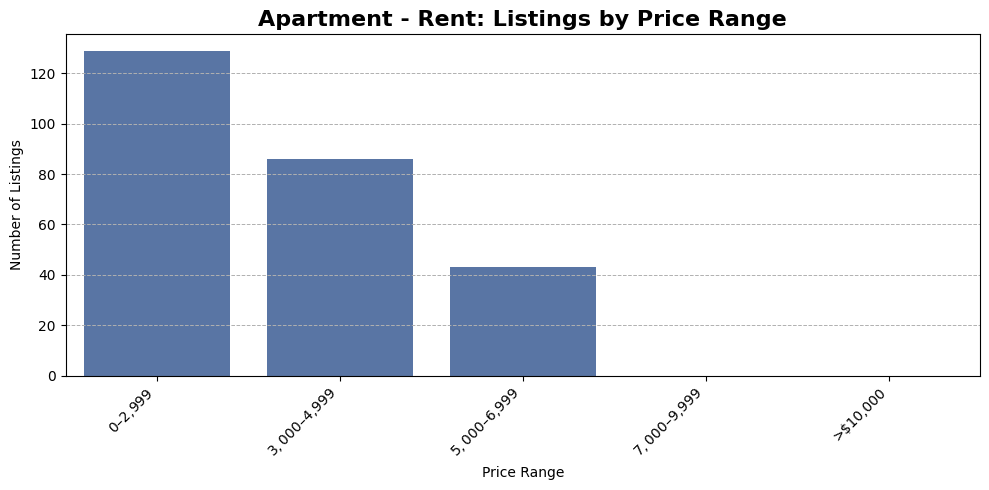

In [7]:
# Apartment - Rent
df_apartment_rent = df_apartments[df_apartments["listing_type"] == "Rent"].copy()
bins_rent = [0, 3000, 5000, 7000, 10000, float("inf")]
labels_rent = [f"${int(bins_rent[i]):,}–${int(bins_rent[i+1])-1:,}" for i in range(len(bins_rent)-2)] + [f">${int(bins_rent[-2]):,}"]
df_apartment_rent["price_range"] = pd.cut(df_apartment_rent["Price_clean"], bins=bins_rent, labels=labels_rent)
count_data_rent_apartment = df_apartment_rent["price_range"].value_counts().reindex(labels_rent)

plt.figure(figsize=(10, 5))
sns.barplot(x=count_data_rent_apartment.index, y=count_data_rent_apartment.values, palette=["#4c72b0"] * len(count_data_rent_apartment))
plt.title("Apartment - Rent: Listings by Price Range", fontsize=16, fontweight='bold')
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(f"{plot_dir}/apartment_rent_price_ranges.png")
plt.show()
plt.close()

/var/folders/f4/8cb37yld1fq6f3z8pbds_ck00000gn/T/ipykernel_35223/3437028037.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data_sale_apartment.index, y=count_data_sale_apartment.values, palette=["#dd8452"] * len(count_data_sale_apartment))


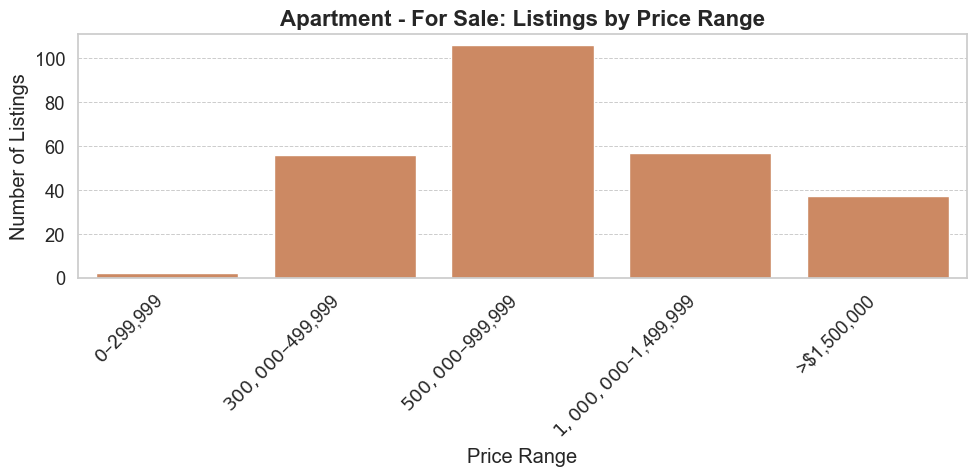

In [45]:
# Apartment - For Sale 
df_apartment_sale = df_apartments[df_apartments["listing_type"] == "For Sale"].copy()
bins_sale = [0, 300000, 500000, 1000000, 1500000, float("inf")]
labels_sale = [f"${int(bins_sale[i]):,}–${int(bins_sale[i+1])-1:,}" for i in range(len(bins_sale)-2)] + [f">${int(bins_sale[-2]):,}"]
df_apartment_sale["price_range"] = pd.cut(df_apartment_sale["Price_clean"], bins=bins_sale, labels=labels_sale)
count_data_sale_apartment = df_apartment_sale["price_range"].value_counts().reindex(labels_sale)

plt.figure(figsize=(10, 5))
sns.barplot(x=count_data_sale_apartment.index, y=count_data_sale_apartment.values, palette=["#dd8452"] * len(count_data_sale_apartment))
plt.title("Apartment - For Sale: Listings by Price Range", fontsize=16, fontweight='bold')
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(f"{plot_dir}/apartment_sale_price_ranges.png")
plt.show()
plt.close()

/var/folders/f4/8cb37yld1fq6f3z8pbds_ck00000gn/T/ipykernel_35223/3660798028.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data_rent_single.index, y=count_data_rent_single.values, palette=["#6aa84f"] * len(count_data_rent_single))


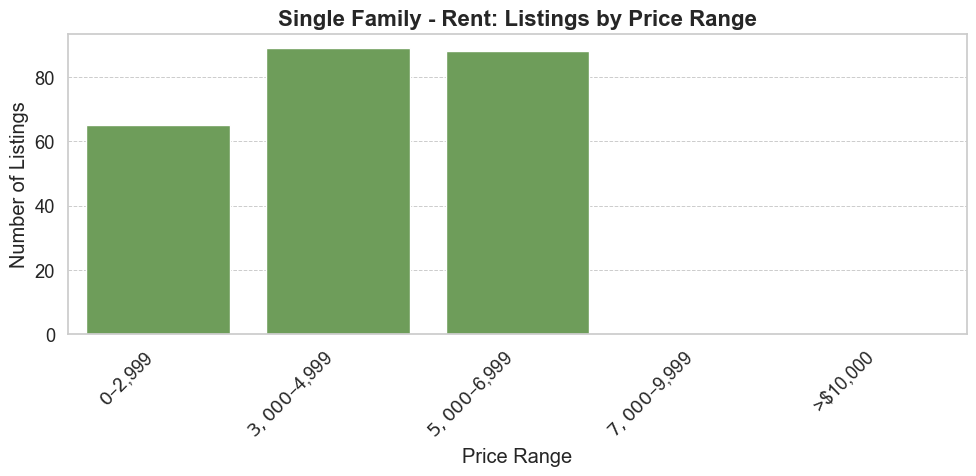

In [46]:
# Single Family - Rent
df_single_rent = df_single_family[df_single_family["listing_type"] == "Rent"].copy()
df_single_rent["price_range"] = pd.cut(df_single_rent["Price_clean"], bins=bins_rent, labels=labels_rent)
count_data_rent_single = df_single_rent["price_range"].value_counts().reindex(labels_rent)

plt.figure(figsize=(10, 5))
sns.barplot(x=count_data_rent_single.index, y=count_data_rent_single.values, palette=["#6aa84f"] * len(count_data_rent_single))
plt.title("Single Family - Rent: Listings by Price Range", fontsize=16, fontweight='bold')
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(f"{plot_dir}/single_house_rent_price_ranges.png")
plt.show()
plt.close()

/var/folders/f4/8cb37yld1fq6f3z8pbds_ck00000gn/T/ipykernel_35223/1306825922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data_sale_single.index, y=count_data_sale_single.values, palette=["#e06666"] * len(count_data_sale_single))


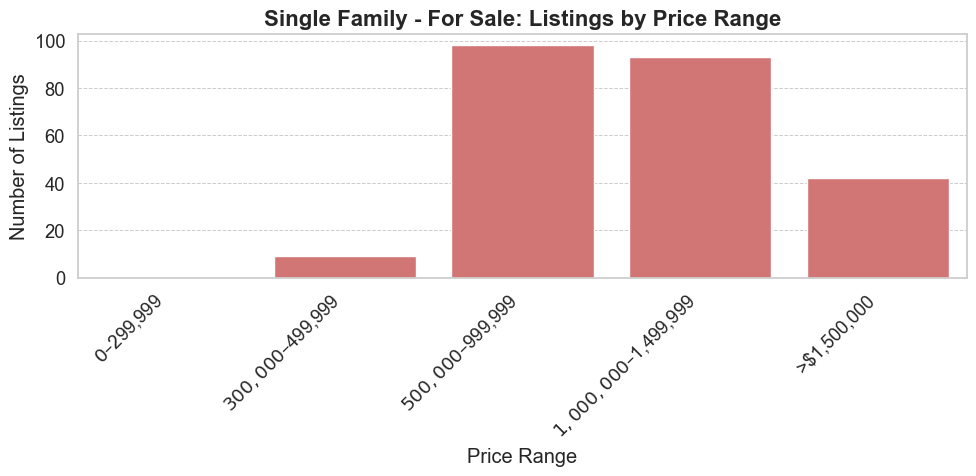

In [47]:
# Single Family - For Sale
df_single_sale = df_single_family[df_single_family["listing_type"] == "For Sale"].copy()
df_single_sale["price_range"] = pd.cut(df_single_sale["Price_clean"], bins=bins_sale, labels=labels_sale)
count_data_sale_single = df_single_sale["price_range"].value_counts().reindex(labels_sale)

plt.figure(figsize=(10, 5))
sns.barplot(x=count_data_sale_single.index, y=count_data_sale_single.values, palette=["#e06666"] * len(count_data_sale_single))
plt.title("Single Family - For Sale: Listings by Price Range", fontsize=16, fontweight='bold')
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(f"{plot_dir}/single_house_sale_price_ranges.png")
plt.show()
plt.close()

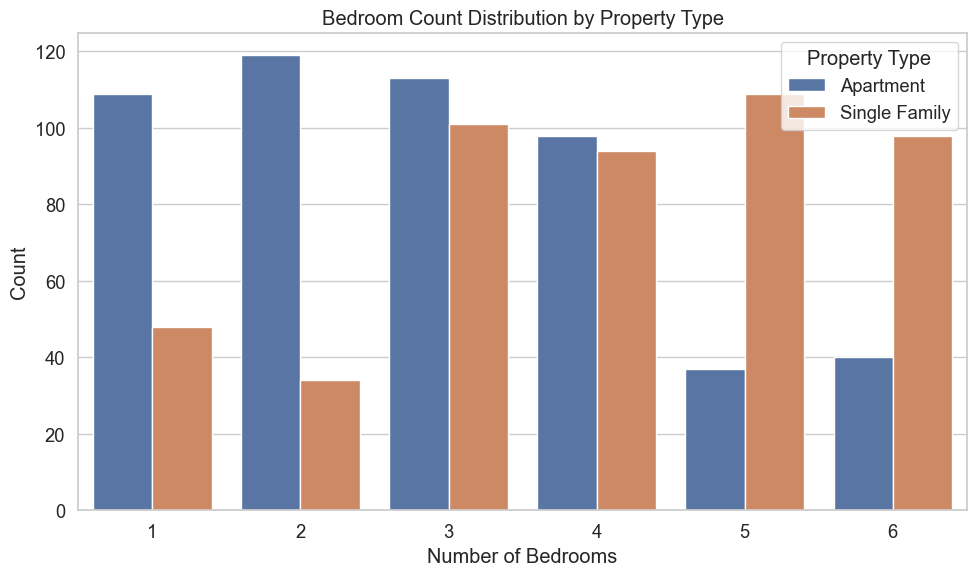

In [48]:
# 2. Bedroom Count Distribution by Property Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x="Bedrooms", hue="Property Type")
plt.title("Bedroom Count Distribution by Property Type")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{plot_dir}/bedroom_distribution_by_property_type.png")
plt.show()
plt.close()

In [50]:
# Return file paths
os.listdir(plot_dir)

['single_house_sale_price_ranges.png',
 'bedroom_distribution_by_property_type.png',
 'apartment_rent_price_ranges.png',
 'single_house_rent_price_ranges.png',
 'apartment_sale_price_ranges.png']